# Import library

In [23]:
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt

# Load dataset

In [24]:
df = pd.read_csv('DataTransformasiTA_tanpa_tanggal.csv')

# Perhitungan frekuensi dan persentase kombinasi 3 itemset

In [25]:
# Daftar item relevan
item_list = [
    "Alat Tulis", "Aksesoris Buku", "Majalah Seni", "Buku Biografi", "Novel Romansa",
    "Majalah Fashion", "Majalah Berita", "Buku Anak-Anak", "Novel Misteri", "Buku Sejarah",
    "Buku Fiksi", "Novel Fiksi Ilmiah"
]

# Filter hanya kolom item relevan
df_filtered = df[item_list]

# Hitung total transaksi
total_transaksi = len(df_filtered)

# Generate kombinasi 3-itemset
kombinasi_3itemset = list(combinations(item_list, 3))

# Hitung frekuensi dan persentase
hasil_3itemset = []

for item1, item2, item3 in kombinasi_3itemset:
    # Hitung berapa transaksi yang mengandung ketiga item
    mask = (df_filtered[item1] == 1) & (df_filtered[item2] == 1) & (df_filtered[item3] == 1)
    freq = mask.sum()
    percent = freq / total_transaksi

    hasil_3itemset.append({
        "Itemset": f"{item1}, {item2}, {item3}",
        "Frekuensi": freq,
        "Persentase (%)": round(percent * 100, 2)
    })

# Buat DataFrame hasil dan tampilkan
df_3itemset = pd.DataFrame(hasil_3itemset).sort_values(by="Frekuensi", ascending=False).reset_index(drop=True)

# Tampilkan hasil
pd.set_option('display.max_rows', None)  # Menampilkan semua baris
print(df_3itemset.to_string(index=False))

                                            Itemset  Frekuensi  Persentase (%)
         Alat Tulis, Aksesoris Buku, Buku Anak-Anak         92           19.13
         Alat Tulis, Majalah Berita, Buku Anak-Anak         71           14.76
          Alat Tulis, Buku Biografi, Buku Anak-Anak         70           14.55
           Alat Tulis, Buku Anak-Anak, Buku Sejarah         70           14.55
           Alat Tulis, Aksesoris Buku, Majalah Seni         68           14.14
             Alat Tulis, Aksesoris Buku, Buku Fiksi         68           14.14
          Alat Tulis, Novel Romansa, Buku Anak-Anak         68           14.14
          Alat Tulis, Aksesoris Buku, Novel Romansa         68           14.14
          Alat Tulis, Buku Anak-Anak, Novel Misteri         67           13.93
           Alat Tulis, Majalah Seni, Buku Anak-Anak         66           13.72
             Alat Tulis, Buku Anak-Anak, Buku Fiksi         65           13.51
          Alat Tulis, Aksesoris Buku, Buku Biografi 

# Menyimpan hasil ke file

In [26]:
df_3itemset.to_csv('hasil_3itemset.csv', index=False)
print("\nDataset frekuensi dan persentase 3 itemset sudah disimpan sebagai 'hasil_3itemset.csv'")


Dataset frekuensi dan persentase 3 itemset sudah disimpan sebagai 'hasil_3itemset.csv'


# Visualisasi

# Plot bar chart 3 itemset

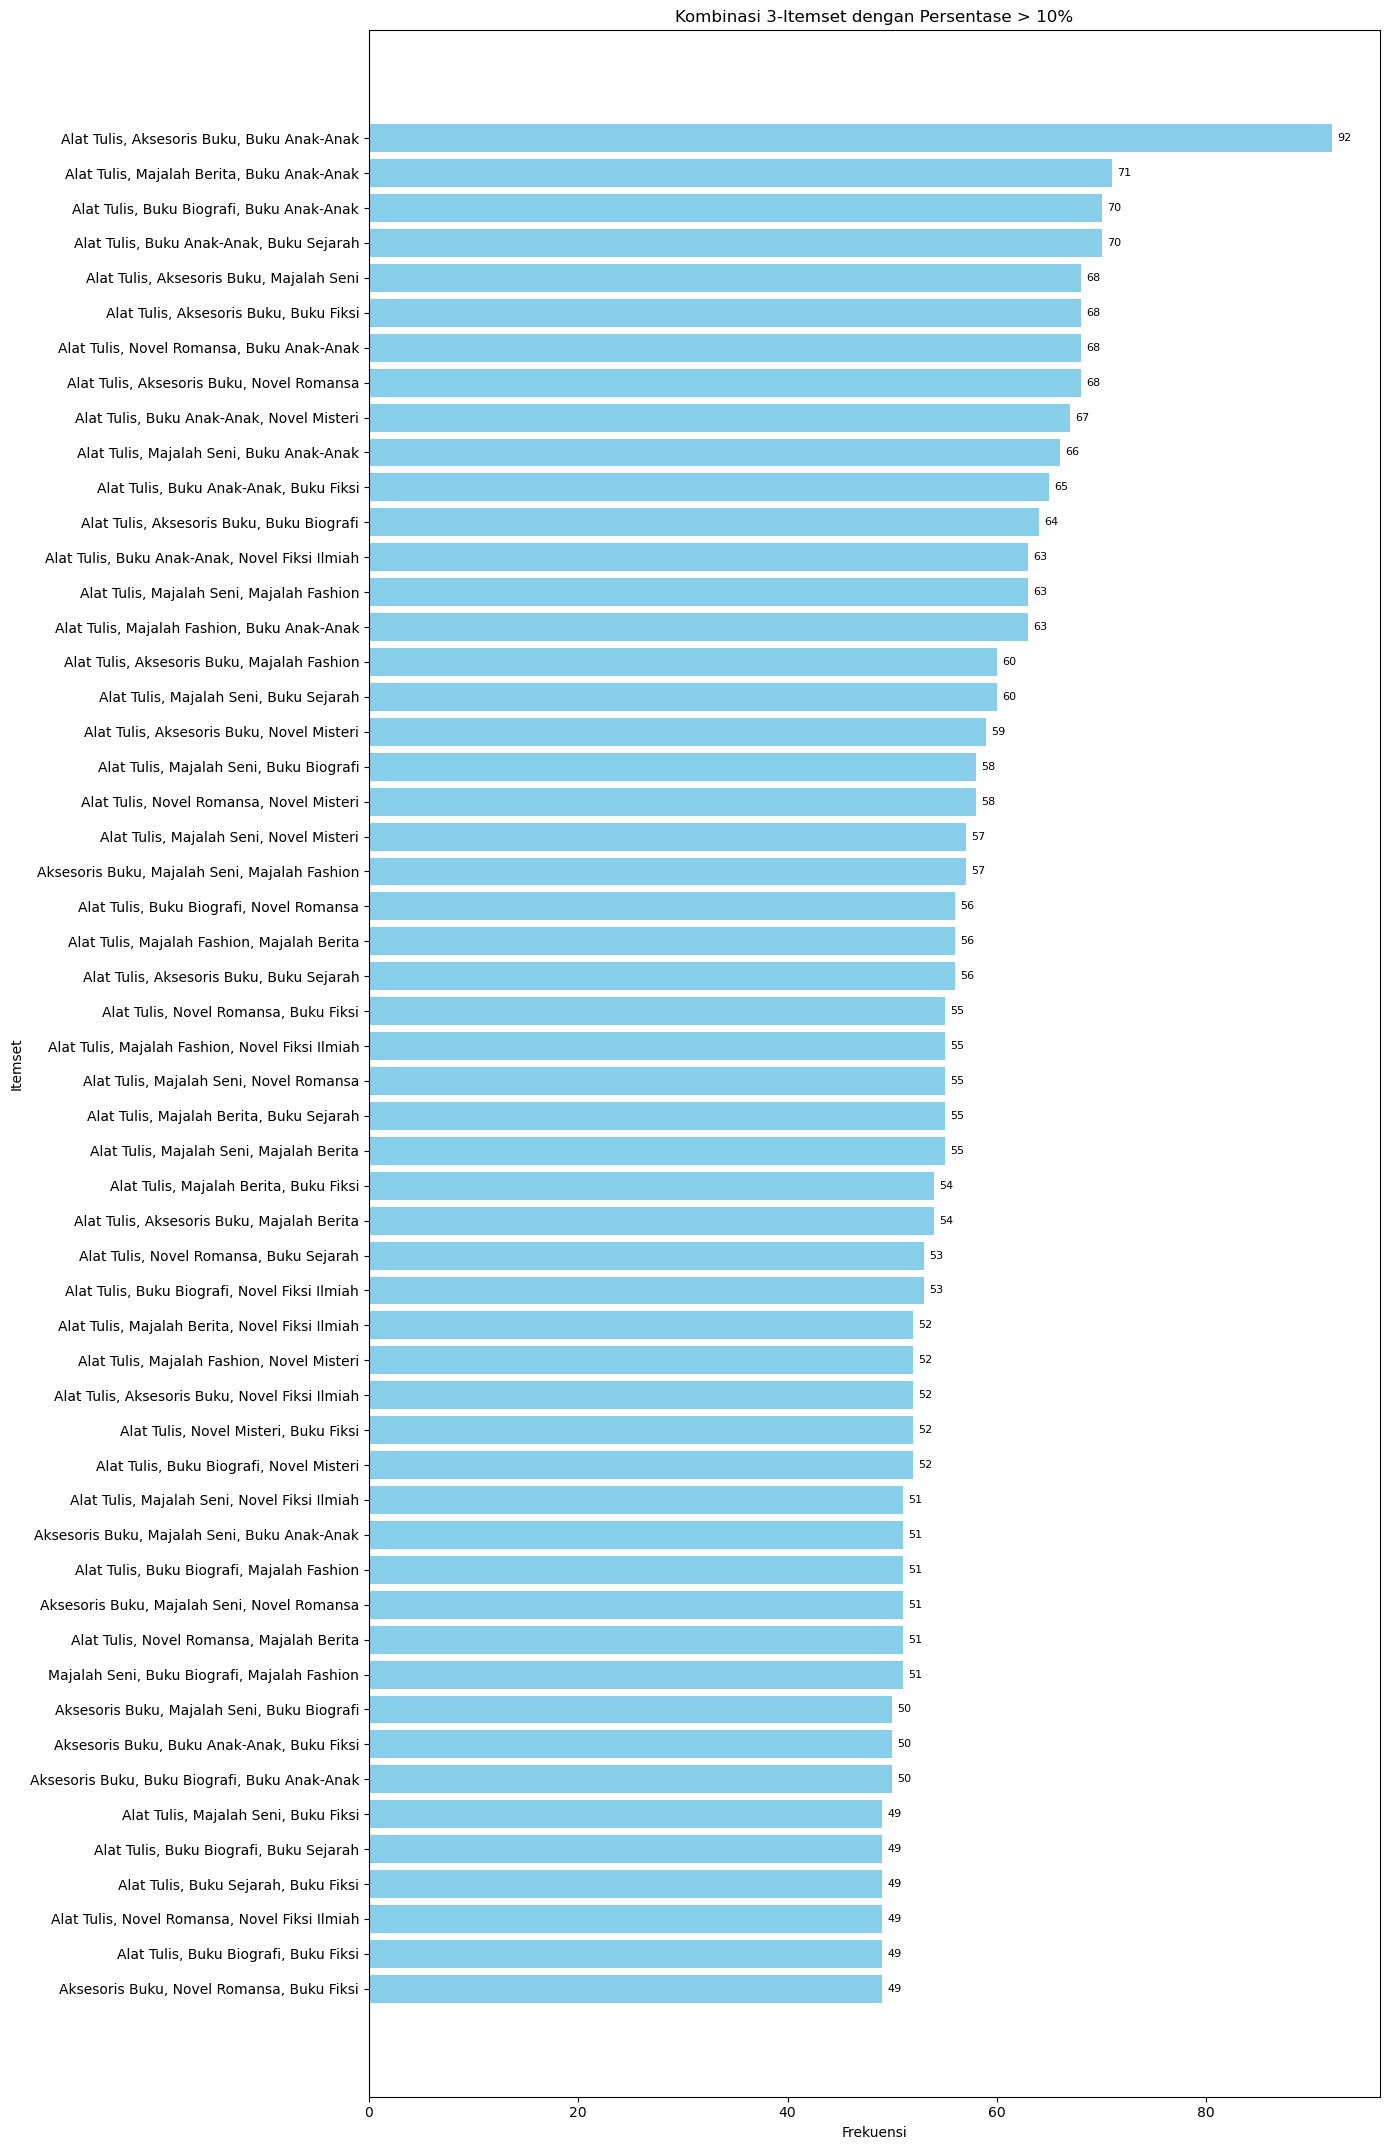

In [27]:
# Filter hanya yang persentasenya > 10.00
df_3itemset_filtered = df_3itemset[df_3itemset["Persentase (%)"] > 10.00].sort_values(by="Frekuensi", ascending=False)

# Cek jika hasil filter kosong
if df_3itemset_filtered.empty:
    print("Tidak ada kombinasi 3-itemset dengan persentase lebih dari 10%.")
else:
    # Buat ukuran figure berdasarkan jumlah itemset yang ditampilkan
    plt.figure(figsize=(14, len(df_3itemset_filtered) * 0.4))  # ukuran dinamis

    # Bar chart horizontal
    plt.barh(df_3itemset_filtered["Itemset"], df_3itemset_filtered["Frekuensi"], color='skyblue')
    plt.xlabel("Frekuensi")
    plt.ylabel("Itemset")
    plt.title("Kombinasi 3-Itemset dengan Persentase > 10%")
    plt.gca().invert_yaxis()  # frekuensi tertinggi di atas

    # Tampilkan label frekuensi di ujung bar
    for i, (freq) in enumerate(df_3itemset_filtered["Frekuensi"]):
        plt.text(freq + 0.5, i, str(freq), va='center', fontsize=8)

    plt.tight_layout()
    plt.show()